<a href="https://colab.research.google.com/github/manyajain7/codtech-sentiment-analysis/blob/main/Sentiment_Analysis_CodTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

sample_data = {
    'review': [
        "I love this product, it's amazing!",
        "Terrible service. Never buying again.",
        "Pretty decent, does the job.",
        "Worst experience ever!",
        "Absolutely fantastic! Highly recommend.",
        "Not worth the money.",
        "Very satisfied with the purchase.",
        "Horrible, waste of time.",
        "Great value for money.",
        "Bad packaging and poor support."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}

df = pd.DataFrame(sample_data)
df.head()


,review,sentiment
0,"I love this product, it's amazing!",1
1,Terrible service. Never buying again.,0
2,"Pretty decent, does the job.",1
3,Worst experience ever!,0
4,Absolutely fantastic! Highly recommend.,1


In [2]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)                 # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)             # Remove punctuation
    text = text.strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment,cleaned_review
0,"I love this product, it's amazing!",1,i love this product its amazing
1,Terrible service. Never buying again.,0,terrible service never buying again
2,"Pretty decent, does the job.",1,pretty decent does the job
3,Worst experience ever!,0,worst experience ever
4,Absolutely fantastic! Highly recommend.,1,absolutely fantastic highly recommend


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


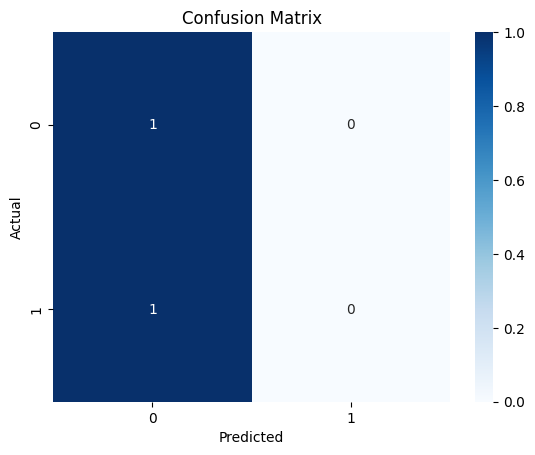

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [7]:
import joblib

joblib.dump(model, 'logistic_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']